<a href="https://colab.research.google.com/github/NIKKISAHA/kerasProjects/blob/main/AustraliaRainTomorrowPrediction/AustraliaRainfallAnalysisMachineLearningMy_first_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv("/content/drive/MyDrive/weatherAUS.csv")
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
com = df.columns[df.isnull().any()] #identify missing col

for i in com: #handling missing value
  if df[i].dtype=="float64":
    imputer = SimpleImputer(strategy='mean')
    df[i]=imputer.fit_transform(df[[i]])
  else:
      imputer = SimpleImputer(strategy='most_frequent')
      df[i]=imputer.fit_transform(df[[i]])

print(df.isnull().sum()) #checking if any missing value
df.duplicated().sum() #checking duplicates in all
df['Date'].duplicated().sum()#checking duplicates in 1 specific coloumn


Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


142024

 **Explorarory Data Analysis (EDA)**

In [7]:
df.columns
# df['Rainfall'].value_counts()
# df['RainTomorrow'].value_counts()

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

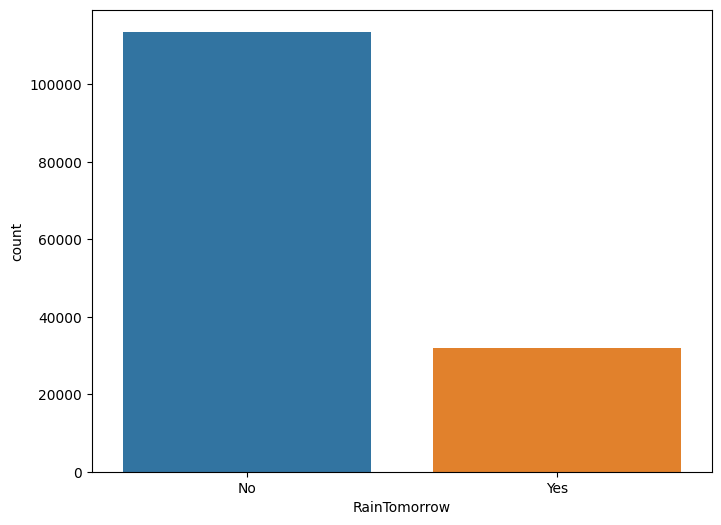

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='RainTomorrow')
plt.xlabel='RainTomorrow'
plt.ylabel='count'
plt.show()

In [9]:
#select features
selected_features = ['MinTemp', 'MaxTemp', 'Rainfall','WindGustSpeed','Humidity9am', 'Humidity3pm']
df[selected_features].describe()
df[selected_features].head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm
0,13.4,22.9,0.6,44.0,71.0,22.0
1,7.4,25.1,0.0,44.0,44.0,25.0
2,12.9,25.7,0.0,46.0,38.0,30.0
3,9.2,28.0,0.0,24.0,45.0,16.0
4,17.5,32.3,1.0,41.0,82.0,33.0


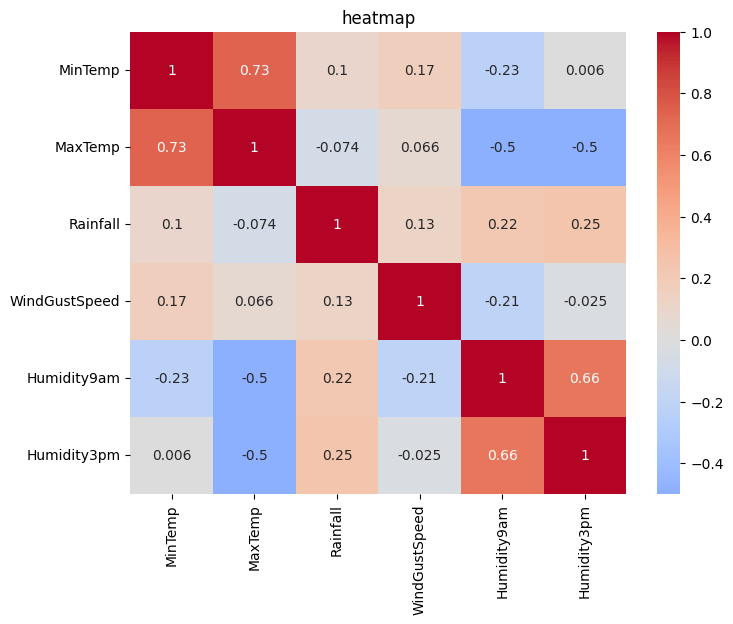

In [10]:
#heatmap on selected features
plt.figure(figsize=(8,6))
sns.heatmap(df[selected_features].corr(),annot=True,cmap='coolwarm',center=0)
plt.title("heatmap")
plt.show()

**ML starts here**

In [29]:
x=df[selected_features].head(700)
y=df[['RainTomorrow']].head(700)
y

,RainTomorrow
0,No
1,No
2,No
3,No
4,No
...,...
695,No
696,No
697,Yes
698,Yes


In [63]:
y=y.replace({'Yes':1,'No':0})
y.value_counts()

RainTomorrow
0               548
1               152
dtype: int64

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm
82,13.7,31.7,0.0,28.00000,63.0,19.0
51,19.3,38.1,0.8,61.00000,48.0,17.0
220,-0.4,15.0,0.2,13.00000,84.0,54.0
669,4.1,17.4,0.0,20.00000,71.0,42.0
545,8.8,20.2,5.8,46.00000,99.0,47.0
...,...,...,...,...,...,...
71,14.9,27.3,0.0,41.00000,50.0,30.0
106,8.4,25.3,0.0,35.00000,78.0,34.0
270,1.1,18.6,0.0,24.00000,87.0,51.0
435,22.1,35.1,0.0,40.03523,58.0,37.0


In [32]:
scale=StandardScaler()
x_train_scaled=scale.fit_transform(x_train)
x_test_scaled=scale.transform(x_test)

x_test_scaled


array([[-8.17491849e-01, -4.04610866e-01, -3.27135190e-01,
        -1.28473467e+00, -2.41366788e-01, -4.96678200e-01],
       [-5.25434875e-01,  1.42012035e-01, -3.27135190e-01,
        -1.14997297e+00,  3.61560793e-01, -3.05746474e-01],
       [ 1.63254166e+00,  1.16237478e+00,  5.89863645e-01,
         3.32405656e-01, -1.31743591e-01, -3.05746474e-01],
       [-6.71463362e-01, -4.28905217e-01, -3.27135190e-01,
        -1.28473467e+00, -7.69319932e-02,  2.83840468e-02],
       [-6.87688750e-01, -2.46697584e-01, -3.27135190e-01,
        -6.78307045e-01, -2.21203950e-02,  1.71582841e-01],
       [-1.68476351e-01, -1.09699987e+00,  1.21342285e+00,
         1.20835666e+00,  6.90430382e-01,  1.03077561e+00],
       [-5.41660262e-01, -1.07270552e+00,  1.47018253e+00,
        -5.43545352e-01,  5.80807186e-01,  5.53446293e-01],
       [-1.06087266e+00, -1.49520179e-01, -3.27135190e-01,
        -1.14997297e+00,  8.75028015e-02, -3.53479405e-01],
       [-7.85041074e-01, -1.14558858e+00, -3.369

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense

In [34]:
model=keras.Sequential()
model.add(Dense(6,input_dim=6,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 42        
                                                                 
 dense_4 (Dense)             (None, 4)                 28        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 75 (300.00 Byte)
Trainable params: 75 (300.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [51]:
model.fit(x_train_scaled,y_train,validation_data=(x_test_scaled,y_test), epochs=40,batch_size=64)

Epoch 1/40
9/9 [==============================] - 60s 8s/step - loss: 0.3233 - accuracy: 0.8482 - val_loss: 0.3166 - val_accuracy: 0.8643
Epoch 2/40
9/9 [==============================] - 0s 8ms/step - loss: 0.3228 - accuracy: 0.8536 - val_loss: 0.3151 - val_accuracy: 0.8643
Epoch 3/40
9/9 [==============================] - 0s 7ms/step - loss: 0.3216 - accuracy: 0.8554 - val_loss: 0.3154 - val_accuracy: 0.8643
Epoch 4/40
9/9 [==============================] - 0s 8ms/step - loss: 0.3209 - accuracy: 0.8500 - val_loss: 0.3153 - val_accuracy: 0.8643
Epoch 5/40
9/9 [==============================] - 0s 9ms/step - loss: 0.3202 - accuracy: 0.8536 - val_loss: 0.3146 - val_accuracy: 0.8643
Epoch 6/40
9/9 [==============================] - 0s 8ms/step - loss: 0.3195 - accuracy: 0.8536 - val_loss: 0.3145 - val_accuracy: 0.8643
Epoch 7/40
9/9 [==============================] - 0s 8ms/step - loss: 0.3188 - accuracy: 0.8554 - val_loss: 0.3137 - val_accuracy: 0.8643
Epoch 8/40
9/9 [==================

In [68]:
test_loss,test_accuracy=model.evaluate(x_test_scaled,y_test)
print("my",test_loss,test_accuracy,)
# x_test_scaled

5/5 [==============================] - 0s 5ms/step - loss: 0.3038 - accuracy: 0.8714
my 0.3037582039833069 0.8714285492897034


In [69]:
from sklearn.metrics import classification_report

In [87]:
prediction = model.predict(x_test_scaled,verbose=0)

In [88]:
# for i in prediction:
#   print(i)
rounded=(prediction > 0.5).astype("int32")
for i in rounded:
  print(i)


[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


In [89]:
print(classification_report(y_test,rounded))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       113
           1       0.74      0.52      0.61        27

    accuracy                           0.87       140
   macro avg       0.81      0.74      0.77       140
weighted avg       0.86      0.87      0.86       140

